<a href="https://colab.research.google.com/github/kien1711/work/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# khai báo thư viện
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [7]:
# khai báo một số biến và đường dẫn
trainning = '../content/drive/MyDrive/tri_tue_nhan_tao/face/train'
test = '..//content/drive/MyDrive/tri_tue_nhan_tao/face/test'
seed = 10
BATCH_SIZE = 16

In [8]:
# mở rộng thêm lượng data bằng cách dùng ImageDataGenerator
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_generator = ImageDataGenerator(rescale=1./255)

In [9]:
# Genera/tor data train

train_generator = data_generator.flow_from_directory(trainning, target_size=(150,150), shuffle=True, seed=seed,  # target_size: resize ảnh đầu ra
                                            class_mode='categorical', batch_size=BATCH_SIZE, subset="training")  # shuffle=True: sắp xếp dữ liệu theo chữ và số

# Generator data validation
validation_generator = val_data_generator.flow_from_directory(trainning, target_size=(150,150), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = test_generator.flow_from_directory(test, target_size=(150,150), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=1) #batch_size = 1 để test từng ảnh 1

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 325 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 101 images belonging to 4 classes.
Classes: ['chitai', 'hoailinh', 'tranthanh', 'truonggiang']


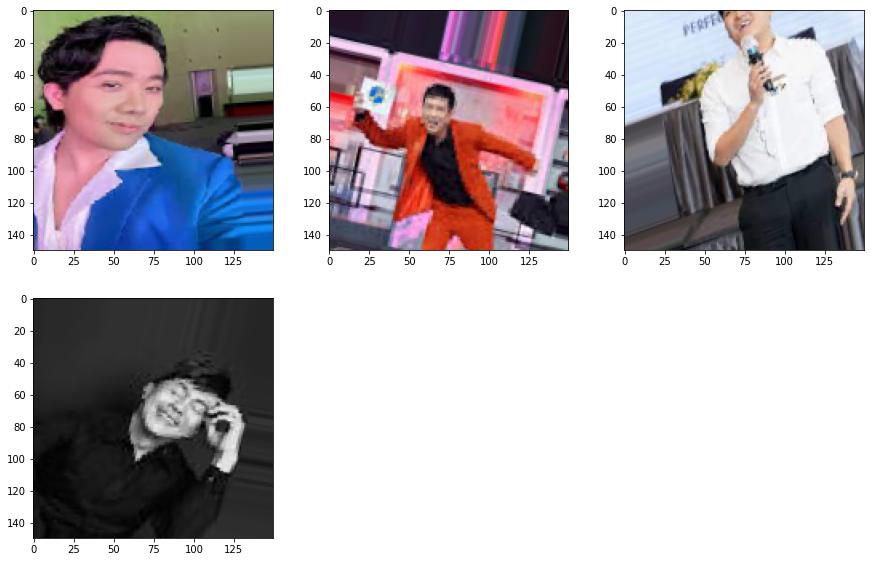

In [10]:
plt.figure(figsize=(15,15))
for i in range(4):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [11]:
model = Sequential()
# input layer
model.add(Conv2D(32,(3,3),activation='relu', 
                 kernel_initializer='he_uniform',
                 padding = 'same', input_shape=(150,150,3))) 
# hidden layer
model.add(Conv2D(64,(3,3),activation='relu', 
                 kernel_initializer='he_uniform',
                 padding = 'same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

# output layer
model.add(Flatten())
model.add(Dense(128,activation='relu',
                kernel_initializer='he_uniform'))

model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 360000)            0         
                                                                 
 dense (Dense)               (None, 128)               46080128  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [12]:
# Compile model
opt=SGD(lr=0.001, momentum=0.9)   # lr toc do hoc
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
#Training
history = model.fit(train_generator,epochs=30,
                    batch_size=64,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/30
21/21 [==============================] - 93s 4s/step - loss: 1.7381 - accuracy: 0.2431 - val_loss: 1.3814 - val_accuracy: 0.2375
Epoch 2/30
21/21 [==============================] - 36s 2s/step - loss: 1.3822 - accuracy: 0.2338 - val_loss: 1.3680 - val_accuracy: 0.2625
Epoch 3/30
21/21 [==============================] - 36s 2s/step - loss: 1.3782 - accuracy: 0.2523 - val_loss: 1.3704 - val_accuracy: 0.3875
Epoch 4/30
21/21 [==============================] - 35s 2s/step - loss: 1.3749 - accuracy: 0.3015 - val_loss: 1.3453 - val_accuracy: 0.3125
Epoch 5/30
21/21 [==============================] - 35s 2s/step - loss: 1.3732 - accuracy: 0.3108 - val_loss: 1.3266 - val_accuracy: 0.3750
Epoch 6/30
21/21 [==============================] - 35s 2s/step - loss: 1.3588 - accuracy: 0.2800 - val_loss: 1.3159 - val_accuracy: 0.4000
Epoch 7/30
21/21 [==============================] - 36s 2s/step - loss: 1.3518 - accuracy: 0.3200 - val_loss: 1.3078 - val_accuracy: 0.4000
Epoch 8/30
21/21 [==

In [15]:
model.save('/content/drive/MyDrive/tri_tue_nhan_tao/face/face.h')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tri_tue_nhan_tao/face/face.h/assets


In [16]:
model_food = tf.keras.models.load_model('/content/drive/MyDrive/tri_tue_nhan_tao/face/face.h')

'hoailinh'

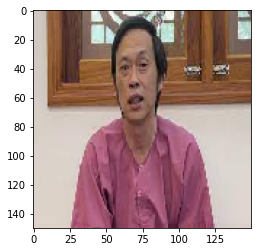

In [25]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/face/pred/hoailinh3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]

'tranthanh'

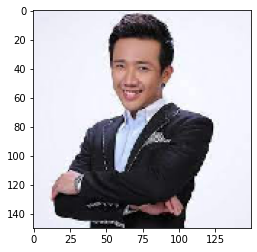

In [26]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/face/pred/tranthanh1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]

'chitai'

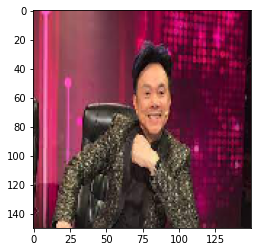

In [27]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/face/pred/chitai1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]